# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [45]:
#Separando entre treino e teste - Aula 6

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
df = pd.read_csv('Mod07 - Tarefa 01.csv', sep=',')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,27.482192,4.024658,1,0,1,0,...,1,1,0,0,0,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pessoas_residencia                   6770 non-null   floa

In [6]:
y = df.mau
y

0       0
1       0
2       0
3       0
4       0
       ..
6765    1
6766    1
6767    1
6768    1
6769    1
Name: mau, Length: 6770, dtype: int64

In [7]:
X = df.drop('mau', axis=1)
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,27.482192,4.024658,1,0,1,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,0,0,1,1,34.857534,3.101370,1,1,1,0,...,1,0,0,1,0,1,0,0,0,0
6766,0,0,1,0,54.109589,9.884932,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6767,0,0,1,0,43.389041,7.380822,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
6768,1,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [9]:
clf = tree.DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

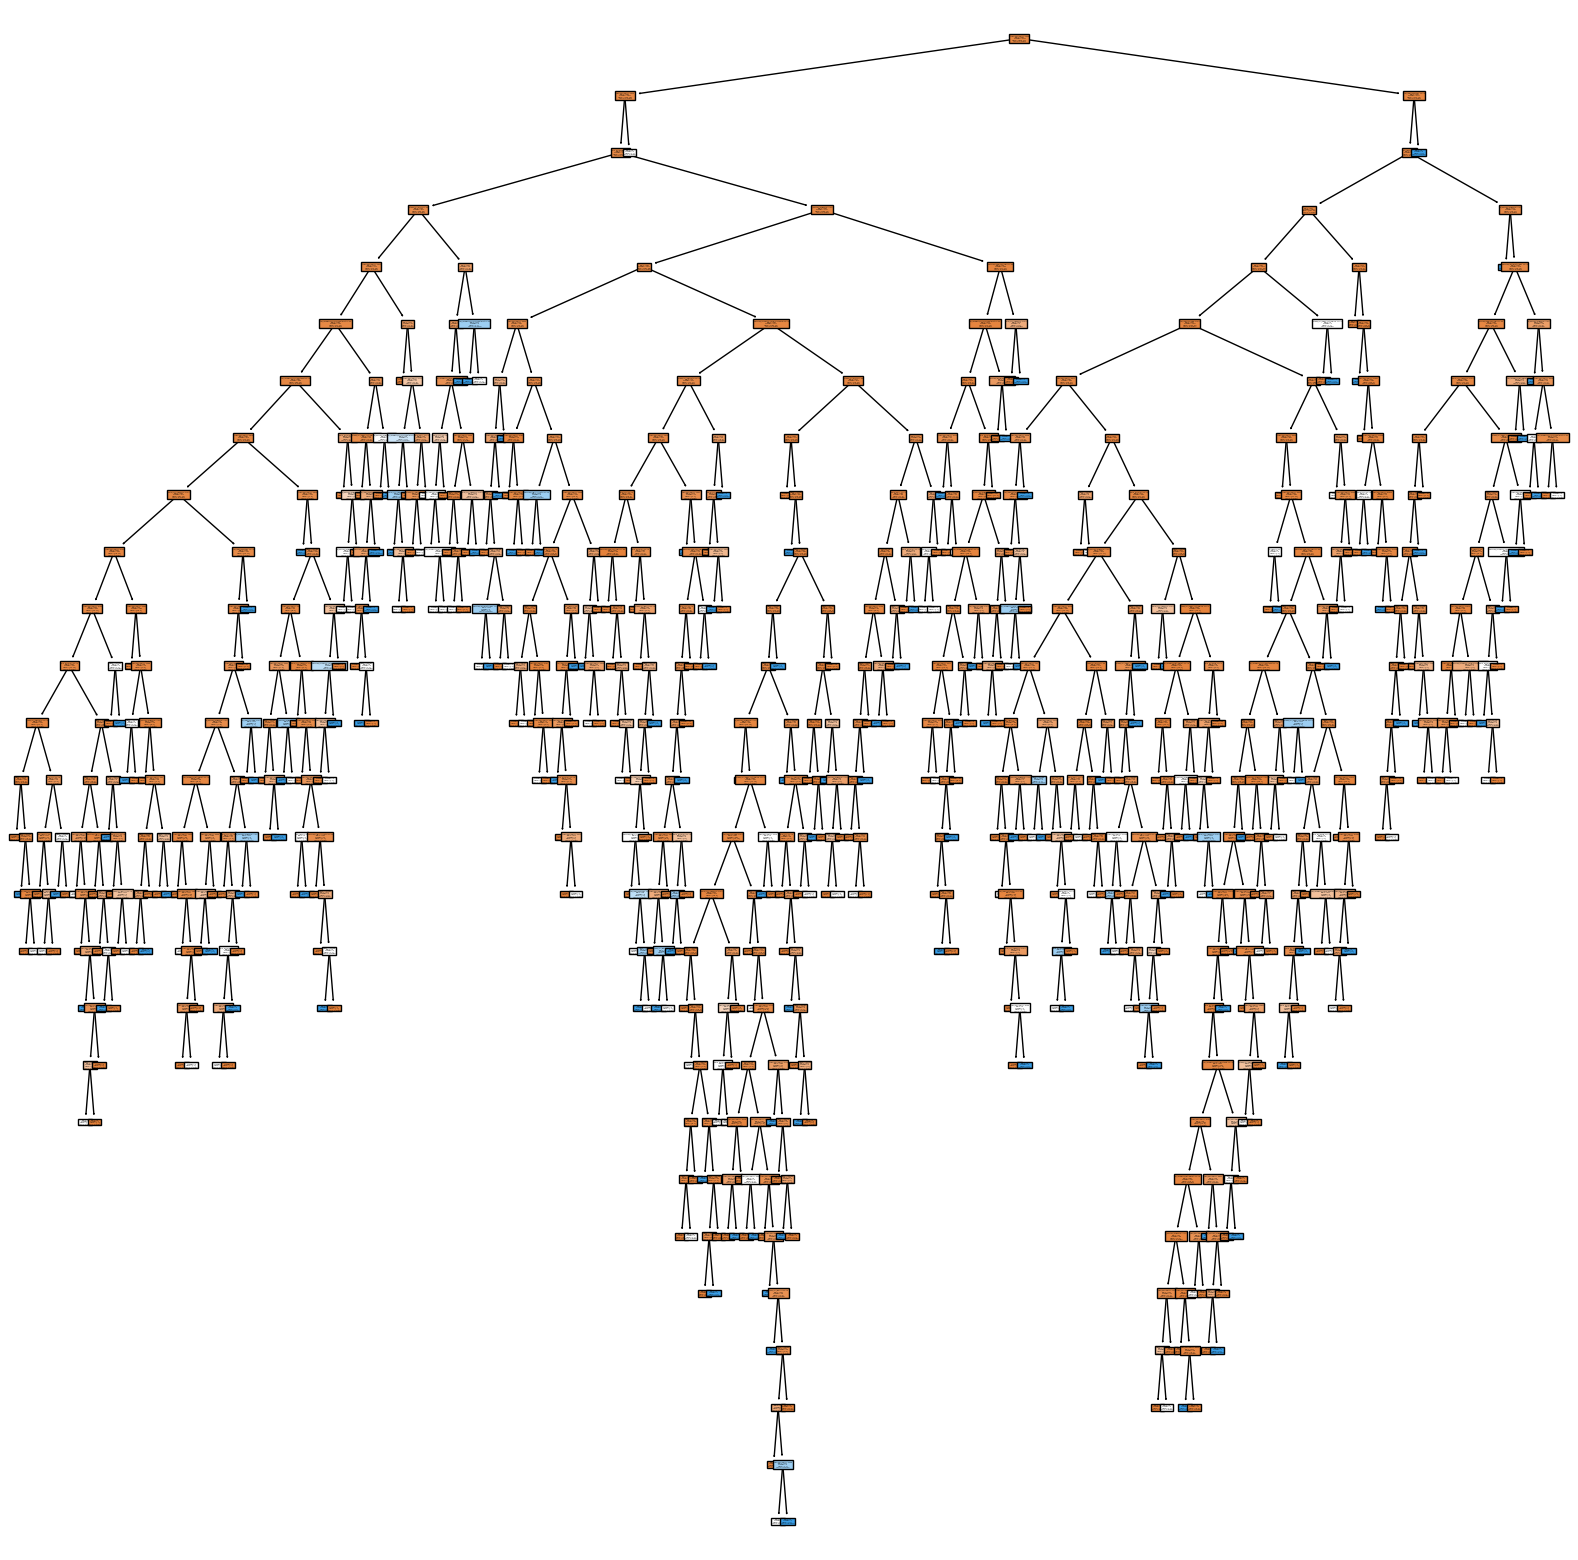

In [10]:
plt.figure(figsize=(20, 20))
tree.plot_tree(clf,
          filled=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X.columns);

In [11]:
predict = clf.predict(X)
predict

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

C:\Users\harle\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


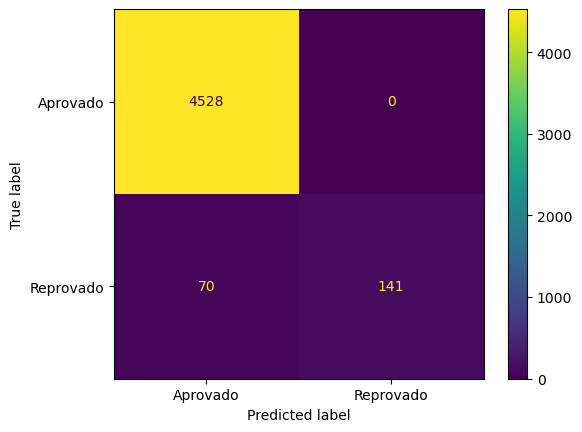

In [12]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Aprovado', 'Reprovado'])

In [13]:
accuracy_score(y, predict)

0.9651403249630723

In [14]:
acuracia = ((4528)+(141))/(4528+141+70)
accuracy_score(y, predict)

0.9651403249630723

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2 = clf.fit(X,y)

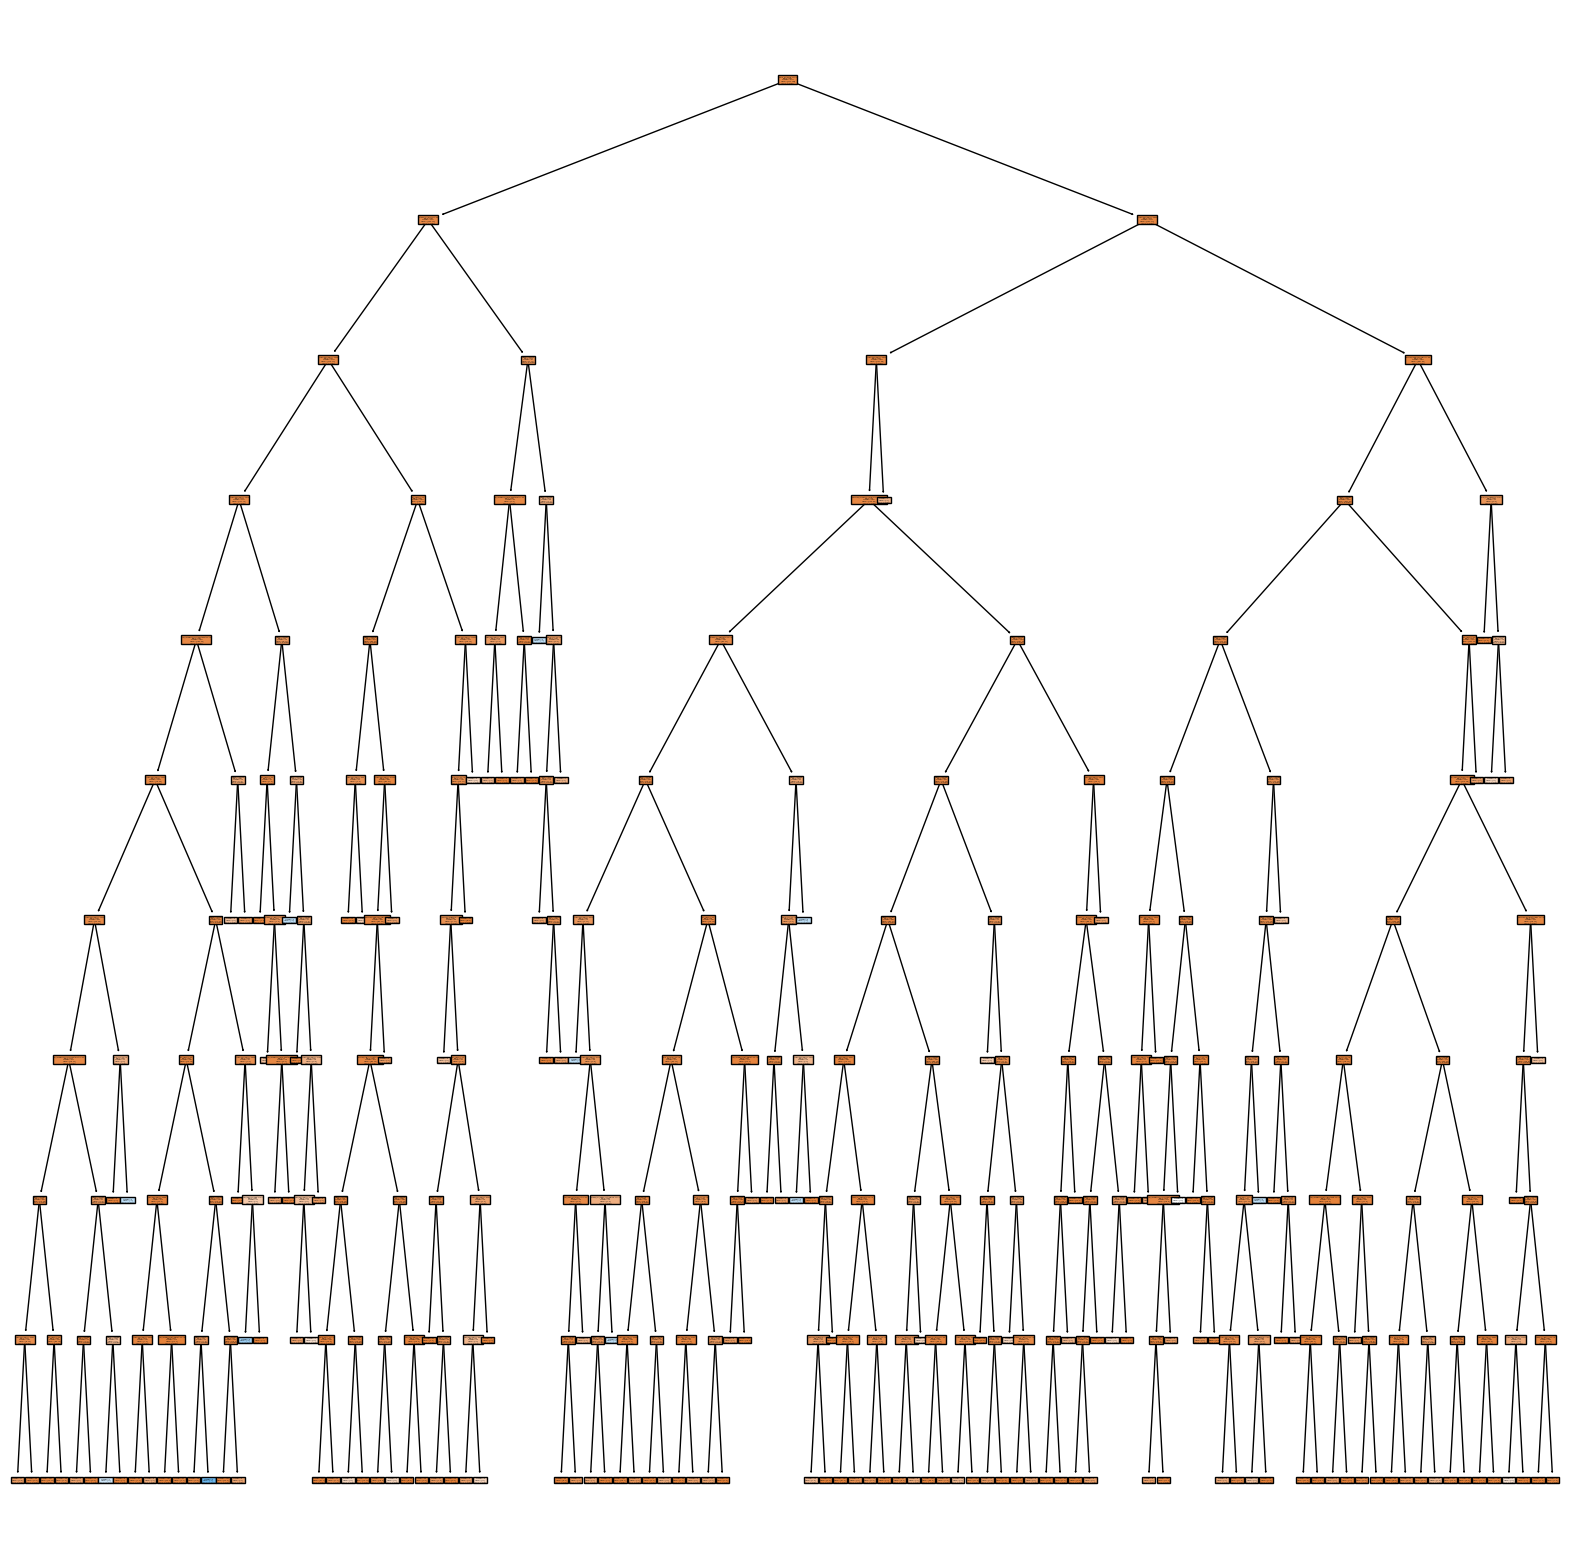

In [16]:
plt.figure(figsize=(20, 20))
tree.plot_tree(clf2,
          filled=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X.columns);

C:\Users\harle\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


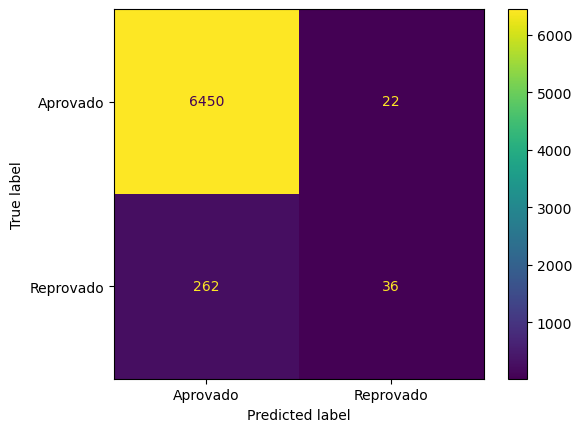

In [17]:
predict2 = clf2.predict(X)
plot_confusion_matrix(clf2, X, y, display_labels=['Aprovado', 'Reprovado'])

In [18]:
acuracia = ((6450)+(36))/(6450+36+262+22)
accuracy_score(y, predict2)

0.9580502215657312

In [28]:
X_train.shape

(4739, 28)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [29]:
y.shape

(6770,)

In [22]:
acuracia = ((6450)+(36))/(6450+36+262+22)
accuracy_score(y, predict2)

0.9580502215657312

In [30]:
f'acuracia = (6450/6770)'

'acuracia = (6450/6770)'